In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import pandas as pd

In [20]:
# Some defaults for beautiful plots
%matplotlib inline
sns.set()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

### Load Data

In [16]:
raw_data = pd.read_csv("gcTrianingSet.csv")
raw_data[:5]

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339


### Check if initialUsedMemory and initialFreeMemory add up

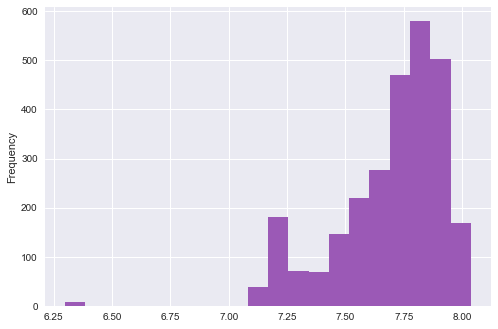

In [53]:
data = raw_data.copy()

data['initialTotalMemory'] = data['initialUsedMemory'] + data['initialFreeMemory']

data['initialTotalMemory'].plot.hist(bins=20)

For some crazy reason the total memory changes over time. And the change is pretty significant to ignore. Let's check final memory usage.

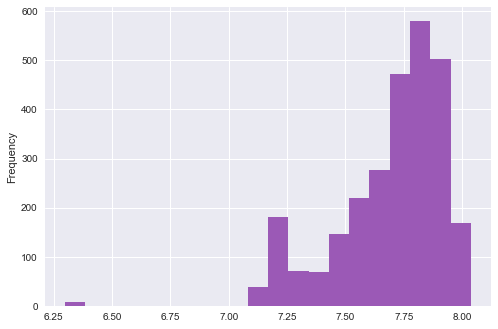

In [52]:
data['finalTotalMemory'] = data['finalUsedMemory'] + data['finalFreeMemory']

data['finalTotalMemory'].plot.hist(bins=20)

At least they match up.

### Distribution of memory utilization

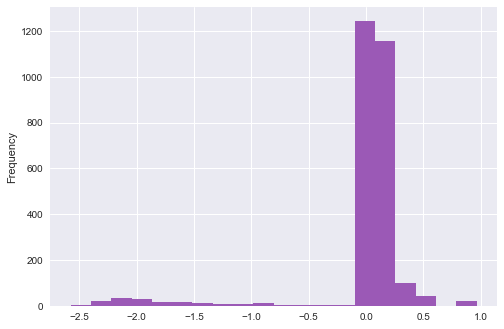

In [54]:
data['memoryUsed'] = data['finalUsedMemory'] - data['initialUsedMemory']

data['memoryUsed'].plot.hist(bins=20)

The negative final memory must be the rows where gc was run.

### Seperate the rows with gc run

In [55]:
data_gc_true = data[(data['gcRun'] == True)]

print(data_gc_true.shape[0])

data_gc_true[:5]

171


,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,initialTotalMemory,memoryUsed
7,4.977155,2.272357,token_8,True,5.055250,4.142316,7.249512,0.19,0.00,0.07,0.154474,4.168083,3.081428,7.249512,-0.809071
14,5.050119,2.199393,token_15,True,5.120831,4.137337,7.249512,0.17,0.01,0.03,0.275411,4.239779,3.009732,7.249512,-0.810340
22,5.045302,2.204210,token_23,True,5.115852,4.132132,7.249512,0.17,0.00,0.02,0.592555,4.656779,2.592733,7.249512,-0.388523
29,5.065997,2.183514,token_30,True,5.110647,4.115836,7.249512,0.13,0.00,0.02,0.119891,4.149363,3.100148,7.249512,-0.916634
38,5.069745,2.179767,token_39,True,5.094352,4.103097,7.249512,0.09,0.00,0.01,0.133800,4.142371,3.107140,7.249512,-0.927374


In [50]:
data_gc_false = data[(data['gcRun'] != True)]

print(data_gc_false.shape[0])

data_gc_false[:5]

2559


,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory,initialTotalMemory
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.371230,4.409714,2.839798,7.249512
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.0,0.0,0.0,0.220883,4.482361,2.767151,7.249512
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.0,0.0,0.0,0.141776,4.542626,2.706886,7.249512
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.0,0.0,0.0,0.156459,4.616293,2.633218,7.249512
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.285218,4.787172,2.462339,7.249512


### Let's plot the distruibution again

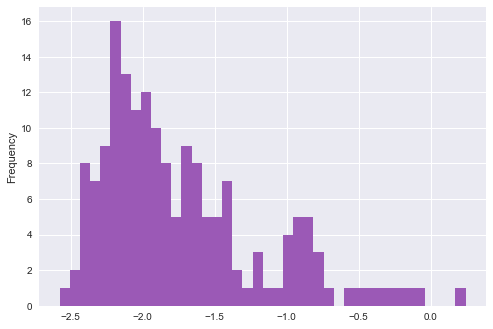

In [38]:
data_gc_true['memoryUsed'].plot.hist(bins=40)

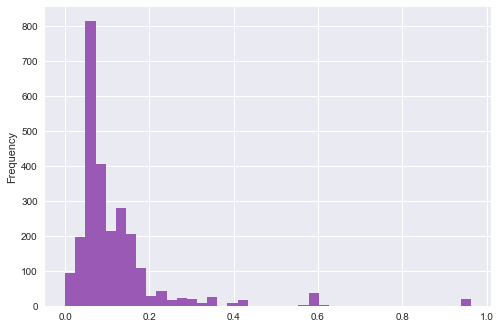

In [37]:
data_gc_false['memoryUsed'].plot.hist(bins=40)

### Distribution of queries

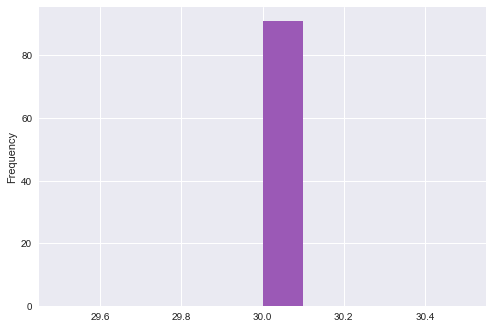

In [49]:
data['query token'].value_counts().plot.hist()

Cool.